<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

# Google Store App Rating Prediction

## Problem statement

The Play Store apps data has enormous potential to drive app-making businesses to success. However, many apps are being developed every single day and only a few of them become profitable.  It is important for developers to be able to predict the success of their app and incorporate features which makes an app successful.
We can collect app data and user ratings from the app stores and use it to extract insightful information.
A machine learning model can be used to predict rating for a given app, which can be used to estimate success and scope of improvement. 


As part of this exercise we will try to predict rating for an app given features like size, number of downloads, etc.



## Data Set Information

Shape - 10841 entries and 13 columns

Attributes - 

App: Application name

Category: Category the app belongs to

Rating: Overall user rating of the app 

Reviews: Number of user reviews for the app

Size: Size of the app 

Installs: Number of user downloads/installs for the app 

Type: Paid or Free

Price: Price of the app 

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store 

Current Ver: Current version of the app available on Play Store 

Android Ver: Min required Android version 


Mount Drive (if using Colab)

In [268]:
# from google.colab import drive

In [269]:
# drive.mount('/content/gdrive')

In [574]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r'D:\D\AI\Great learning 2021\Ensemble techniques\Assignments')

## 1.Import Pandas and Read the Dataset

In [575]:
import pandas as pd
df = pd.read_csv("Apps_data+(1).csv")
df.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [576]:
df.shape

(10841, 13)

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2. EDA and Preprocessing

### 2.1 Check info and summary statistics of the dataset. List out the columns that need to be worked upon for model building

In [578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Sample 5 examples from the Rating column

In [579]:
df.Rating.sample(5)

10167    4.6
9159     4.2
5622     4.3
5361     4.6
9488     4.3
Name: Rating, dtype: float64

Check for NaN values

In [580]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Check summary statistics of the numerical columns in the dataframe

In [581]:
df.describe(include = "all").T

# App:9660 unique values are there, so there could be duplicate entries.
# Category: There are 34 unique categories & 120 Genres 
# Rating: Rating range from 1 to 19 (Having few missing values).
# Price: Majority apps are free.
# Content Rating: Most of the apps are for everyone
# Android Ver: Most apps are having 4.1 and up.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367,NaN,NaN,NaN,4.19334,0.537431,1,4,4.3,4.5,19
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2 App Column

Let's look closely at the apps in the data 

In [582]:
df.App.sample(5)

2494                                          MoodSpace
6819                                 BU Questrom Launch
4928                      AC - Tips & News for Android™
8752                      Dulquer Salmaan HD Wallpapers
8978    DW Learn German - A1, A2, B1 and placement test
Name: App, dtype: object

In [583]:
df['App'].value_counts().loc[lambda x: x > 1].reset_index(name='count')


,index,count
0,ROBLOX,9
1,"CBS Sports App - Scores, News, Stats & Watch Live",8
2,8 Ball Pool,7
3,Duolingo: Learn Languages Free,7
4,Candy Crush Saga,7
...,...,...
793,Diabetes & Diet Tracker,2
794,Wheretoget: Shop in style,2
795,FlirtChat - ♥Free Dating/Flirting App♥,2
796,Mango Languages: Lovable Language Courses,2


Take 3 sample Apps for exploration (for eg: 'ROBLOX', 'ESPN','Nick')

In [584]:
df[df["App"].isin(["ROBOLOX", "ESPN", "NICK"])].sort_values(by = "App")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


In [585]:
df.sort_values(by = "Reviews",inplace=True)

Drops other duplicate entries keeping the App with the highest reviews

In [586]:
df.drop_duplicates('App',inplace=True)

In [587]:
df.App.value_counts()


Mobi Calculator free & AD free!                       1
CI Stream                                             1
Photo Frames                                          1
Tomb of the Mask                                      1
Number Therapy                                        1
                                                     ..
EU VAT Checker                                        1
EZ-GUI Ground Station                                 1
Jungle Marble Blast                                   1
iFORA BP                                              1
Virtual Mother Surgery Doctor : Emergency Hospital    1
Name: App, Length: 9660, dtype: int64

In [588]:
df.shape

(9660, 13)

Verify that duplicates has been removed

Check shape of the dataframe

### 2.2 Category Column

Check out the App categories

In [589]:
df["Category"].value_counts()

FAMILY                 1862
GAME                    940
TOOLS                   828
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               115
FOOD_AND_DRINK          112
ENTERTAINMENT            93
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

Drop the category named 1.9, unknown category and invalid category

In [590]:
df = df[df['Category'] != '1.9']

In [591]:
df["Category"].value_counts()

FAMILY                 1862
GAME                    940
TOOLS                   828
BUSINESS                419
MEDICAL                 396
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  327
COMMUNICATION           316
HEALTH_AND_FITNESS      287
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               115
FOOD_AND_DRINK          112
ENTERTAINMENT            93
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

Visualize App category column

C:\Users\sreev\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


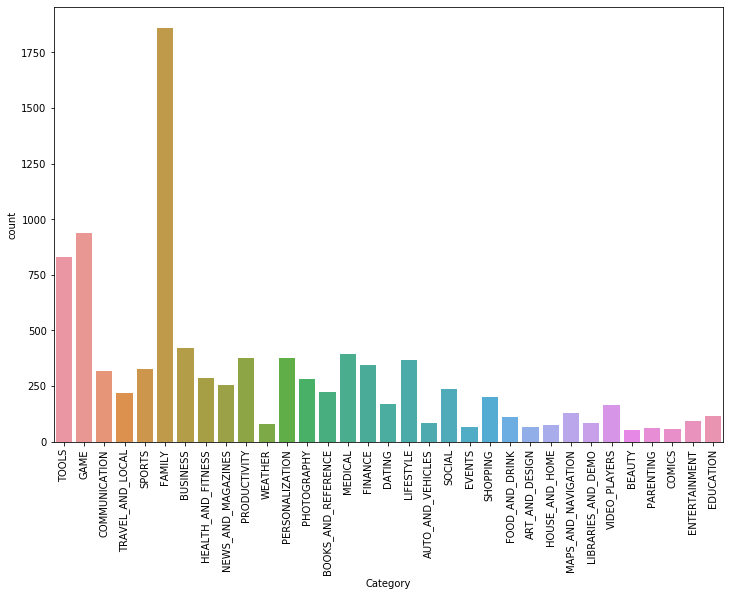

In [592]:
plt.figure(figsize=(12, 8))
sns.countplot(df['Category']);
plt.xticks(rotation='vertical');

### 2.3 Rating Column

Check summary statistics of Rating column

In [593]:
df['Rating'].describe()

count    8195.000000
mean        4.173362
std         0.536397
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Check the rating distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5057016C8>]],
      dtype=object)

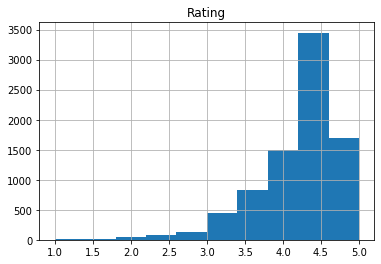

In [594]:
df.hist(column="Rating")

Check the rating dataframe shape

In [595]:
df["Rating"].shape

(9659,)

Check for null values in the rating dataframe

In [596]:
df.isnull().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Drop the NaN values

In [597]:
df = df.dropna()

Convert ratings to high and low categories(>3.5 is high rest low)

In [598]:
df['Rating_cat'] = df.Rating.apply(lambda x : "High" if x > 3.5 else "Low")


In [599]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat
7139,CB Register,FAMILY,5.0,1,5.6M,10+,Free,0,Everyone,Entertainment,"June 27, 2018",1.0,4.1 and up,High
8391,DG OFF - 100% Free Coupons & Deals,SHOPPING,5.0,1,1.1M,10+,Free,0,Everyone,Shopping,"July 11, 2018",1.0,4.0 and up,High
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up,Low
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6M,5+,Free,0,Everyone,Medical,"August 2, 2018",2.0,4.0 and up,High
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9M,"1,000+",Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up,Low


Add the categorical column to the data 

Check shape of the newly created dataframe

In [600]:
df.Rating_cat.shape

(8189,)

Check for null columns

In [601]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Rating_cat        0
dtype: int64

Check count of high and low ratings

In [602]:
df["Rating_cat"].value_counts()

High    7317
Low      872
Name: Rating_cat, dtype: int64

Plot the same

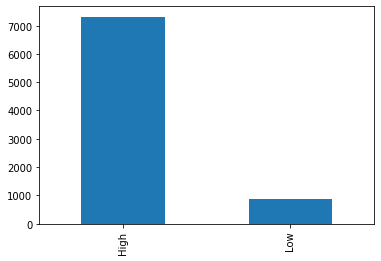

In [603]:
df["Rating_cat"].value_counts().plot(kind = "bar")

### 2.4 Review Column

Convert Reviews to numeric

In [604]:
df['Reviews'] = pd.to_numeric(df["Reviews"], errors = "coerce")

Check info

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8189 entries, 7139 to 2989
Data columns (total 14 columns):
App               8189 non-null object
Category          8189 non-null object
Rating            8189 non-null float64
Reviews           8189 non-null int64
Size              8189 non-null object
Installs          8189 non-null object
Type              8189 non-null object
Price             8189 non-null object
Content Rating    8189 non-null object
Genres            8189 non-null object
Last Updated      8189 non-null object
Current Ver       8189 non-null object
Android Ver       8189 non-null object
Rating_cat        8189 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 959.6+ KB


C:\Users\sreev\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


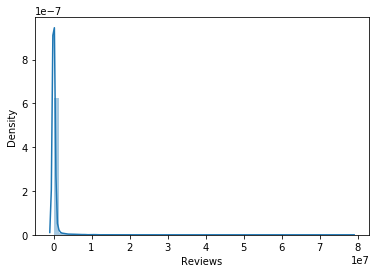

In [606]:
sns.distplot(df["Reviews"])

Convert Reviews to numeric

 Review distibution 

### 2.5 Size Column

Working on Size column

The column currently contail alphanumeric values. 

Check count

In [607]:
df["Size"].value_counts()

Varies with device    1169
14M                    148
12M                    147
11M                    143
13M                    143
                      ... 
93k                      1
500k                     1
963k                     1
444k                     1
48k                      1
Name: Size, Length: 413, dtype: int64

Replace M with 1 million and k with 1 thousand

In [608]:
def convert(x):
    if 'M' in x:
        return float(x.split('M')[0]) * 1000000
    elif 'k' in x:
        return float(x.split('k')[0]) * 1000
        
df['Size_num'] = df['Size'].apply(lambda x : convert(x))


In [609]:
df[["Size", "Size_num"]]

,Size,Size_num
7139,5.6M,5600000.0
8391,1.1M,1100000.0
5151,28M,28000000.0
2459,4.6M,4600000.0
6319,4.9M,4900000.0
...,...,...
3079,33M,33000000.0
3229,22M,22000000.0
2723,18M,18000000.0
4970,91k,91000.0


Check Size values counts

In [611]:
df["Size"].value_counts()

Varies with device    1169
14M                    148
12M                    147
11M                    143
13M                    143
                      ... 
93k                      1
500k                     1
963k                     1
444k                     1
48k                      1
Name: Size, Length: 413, dtype: int64

In [612]:
df["Size_num"].value_counts()

14000000.0    148
12000000.0    147
11000000.0    143
13000000.0    143
15000000.0    139
             ... 
251000.0        1
420000.0        1
210000.0        1
293000.0        1
930000.0        1
Name: Size_num, Length: 411, dtype: int64

convert column to numeric, dropping non numeric values





Check info

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8189 entries, 7139 to 2989
Data columns (total 15 columns):
App               8189 non-null object
Category          8189 non-null object
Rating            8189 non-null float64
Reviews           8189 non-null int64
Size              8189 non-null object
Installs          8189 non-null object
Type              8189 non-null object
Price             8189 non-null object
Content Rating    8189 non-null object
Genres            8189 non-null object
Last Updated      8189 non-null object
Current Ver       8189 non-null object
Android Ver       8189 non-null object
Rating_cat        8189 non-null object
Size_num          7020 non-null float64
dtypes: float64(2), int64(1), object(12)
memory usage: 1023.6+ KB


Check for NaN values

In [614]:
df["Size_num"].isna().sum()
# It should be 1169

1169

Impute the null values in "Size" column 

In [ ]:
df["Size_num"].mode()

In [617]:
df["Size_num"].fillna(df["Size_num"].mode()[0], inplace = True)

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8189 entries, 7139 to 2989
Data columns (total 15 columns):
App               8189 non-null object
Category          8189 non-null object
Rating            8189 non-null float64
Reviews           8189 non-null int64
Size              8189 non-null object
Installs          8189 non-null object
Type              8189 non-null object
Price             8189 non-null object
Content Rating    8189 non-null object
Genres            8189 non-null object
Last Updated      8189 non-null object
Current Ver       8189 non-null object
Android Ver       8189 non-null object
Rating_cat        8189 non-null object
Size_num          8189 non-null float64
dtypes: float64(2), int64(1), object(12)
memory usage: 1023.6+ KB


In [619]:
df["Size_num"].isna().sum()

0

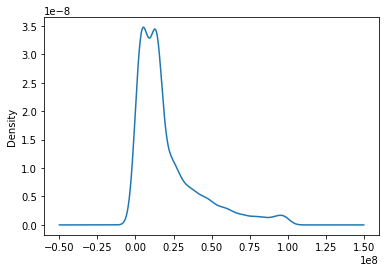

In [620]:
df["Size_num"].plot(kind = "kde")

### 2.6 Install Column

Check value counts

In [621]:
df["Installs"].value_counts

<bound method IndexOpsMixin.value_counts of 7139           10+
8391           10+
5151           50+
2459            5+
6319        1,000+
           ...    
3079    1,000,000+
3229      500,000+
2723    1,000,000+
4970      100,000+
2989    1,000,000+
Name: Installs, Length: 8189, dtype: object>

Replace , and + with space

In [622]:
df['Installs'] = df['Installs'].str.replace(",", "").str.replace("+",'')


Convert to numeric type

In [623]:
df['Installs'] = pd.to_numeric(df["Installs"])

Check value counts

In [624]:
df['Installs'].value_counts()

1000000       1415
100000        1095
10000          987
10000000       936
1000           695
5000000        605
500000         502
50000          456
5000           424
100            302
50000000       203
500            199
100000000      189
10              69
50              56
500000000       24
1000000000      20
5                9
1                3
Name: Installs, dtype: int64

Check info

In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8189 entries, 7139 to 2989
Data columns (total 15 columns):
App               8189 non-null object
Category          8189 non-null object
Rating            8189 non-null float64
Reviews           8189 non-null int64
Size              8189 non-null object
Installs          8189 non-null int64
Type              8189 non-null object
Price             8189 non-null object
Content Rating    8189 non-null object
Genres            8189 non-null object
Last Updated      8189 non-null object
Current Ver       8189 non-null object
Android Ver       8189 non-null object
Rating_cat        8189 non-null object
Size_num          8189 non-null float64
dtypes: float64(2), int64(2), object(11)
memory usage: 1023.6+ KB


Get the bin levels

In [626]:
bin_levels = df["Installs"].sort_values().unique()

Create bins for Installs

In [627]:
df["Install_cat"] = df["Installs"].replace(bin_levels, range(0, len(bin_levels)))

In [628]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_cat,Size_num,Install_cat
7139,CB Register,FAMILY,5.0,1,5.6M,10,Free,0,Everyone,Entertainment,"June 27, 2018",1.0,4.1 and up,High,5600000.0,2
8391,DG OFF - 100% Free Coupons & Deals,SHOPPING,5.0,1,1.1M,10,Free,0,Everyone,Shopping,"July 11, 2018",1.0,4.0 and up,High,1100000.0,2
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up,Low,28000000.0,3
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6M,5,Free,0,Everyone,Medical,"August 2, 2018",2.0,4.0 and up,High,4600000.0,1
6319,BJ Bridge Standard American 2018,GAME,1.0,1,4.9M,1000,Free,0,Everyone,Card,"May 21, 2018",6.2-sayc,4.0 and up,Low,4900000.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,1000000,Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up,High,33000000.0,12
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,500000,Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up,High,22000000.0,11
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,1000000,Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up,High,18000000.0,12
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,100000,Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up,Low,91000.0,10


### 2.7 Type

Get value counts

In [629]:
df['Type'].value_counts()

Free    7589
Paid     600
Name: Type, dtype: int64

Plot pie chart for percentage of free vs paid app in store

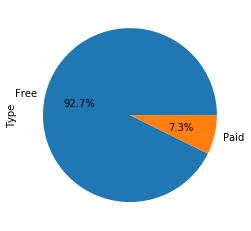

In [630]:
df['Type'].value_counts().plot(kind='pie', autopct = "%1.1f%%")

Check the columns and info

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8189 entries, 7139 to 2989
Data columns (total 16 columns):
App               8189 non-null object
Category          8189 non-null object
Rating            8189 non-null float64
Reviews           8189 non-null int64
Size              8189 non-null object
Installs          8189 non-null int64
Type              8189 non-null object
Price             8189 non-null object
Content Rating    8189 non-null object
Genres            8189 non-null object
Last Updated      8189 non-null object
Current Ver       8189 non-null object
Android Ver       8189 non-null object
Rating_cat        8189 non-null object
Size_num          8189 non-null float64
Install_cat       8189 non-null int64
dtypes: float64(2), int64(3), object(11)
memory usage: 1.1+ MB


### 2.8 Price

Check value counts

In [632]:
df.Price.value_counts()

0          7589
$2.99       109
$0.99       103
$4.99        68
$1.99        59
           ... 
$1.20         1
$37.99        1
$2.90         1
$3.02         1
$389.99       1
Name: Price, Length: 73, dtype: int64

Replace $ with space

In [633]:
df['Price'] = df['Price'].str.replace("$", "")

convert column to numeric, dropping non numeric values

In [634]:
df['Price'] =  pd.to_numeric(df["Price"])

Get summary statistics

In [635]:
df.Price.describe()
# count = 8190, max = 400

count    8189.000000
mean        1.036029
std        16.864428
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

## Data Preparation

Check info

In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8189 entries, 7139 to 2989
Data columns (total 16 columns):
App               8189 non-null object
Category          8189 non-null object
Rating            8189 non-null float64
Reviews           8189 non-null int64
Size              8189 non-null object
Installs          8189 non-null int64
Type              8189 non-null object
Price             8189 non-null float64
Content Rating    8189 non-null object
Genres            8189 non-null object
Last Updated      8189 non-null object
Current Ver       8189 non-null object
Android Ver       8189 non-null object
Rating_cat        8189 non-null object
Size_num          8189 non-null float64
Install_cat       8189 non-null int64
dtypes: float64(3), int64(3), object(10)
memory usage: 1.1+ MB


Drop 'App','Content Rating','Genres','Last Updated', 'Current Ver','Android Ver' columns

In [678]:
df_new = df.drop(['App','Content Rating','Genres','Last Updated', 'Current Ver','Android Ver', 'Rating', 'Size', 'Installs'], axis = 1)

In [679]:
df_new.head()

,Category,Reviews,Type,Price,Rating_cat,Size_num,Install_cat
7139,FAMILY,1,Free,0.0,High,5600000.0,2
8391,SHOPPING,1,Free,0.0,High,1100000.0,2
5151,MEDICAL,1,Free,0.0,Low,28000000.0,3
2459,MEDICAL,1,Free,0.0,High,4600000.0,1
6319,GAME,1,Free,0.0,Low,4900000.0,6


One hot encode 'Rating_cat','Type','Category' columns

In [680]:
from sklearn.preprocessing import OneHotEncoder

df_new = pd.get_dummies(df_new, columns = ["Category", "Rating_cat", "Type"], drop_first = True)


In [681]:
df_new.shape

(8189, 38)

Drop 'Rating_cat_Low','Rating' columns for feature and make 'Rating_cat_Low' as target

In [682]:
X = df_new.drop("Rating_cat_Low", axis = 1)
Y = df_new["Rating_cat_Low"]

Split train and test samples(Split size = 0.3 and random_state = 42)

In [683]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [684]:
x_train.shape, y_train.shape
# 5733, 37,5733

((5732, 37), (5732,))

In [685]:
x_test.shape, y_test.shape
# 2457, 37, 5733

((2457, 37), (2457,))

In [686]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)


## Model Building

### 4.1 Classification

Write a function to fit and print the model predictions, input parameters would be model, X_train, X_test, y_train and y_test

In [687]:
from sklearn.metrics import confusion_matrix, classification_report

def fitPrint(model, x_train, y_train, x_test, y_test):
    
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    
    print("Training Accuracy :", model.score(x_train, y_train))
    print("Training Accuracy :", model.score(x_test, y_test))
    
    print("*" * 50)
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))

In [688]:
df_new.isnull().sum()

Reviews                         0
Price                           0
Size_num                        0
Install_cat                     0
Category_AUTO_AND_VEHICLES      0
Category_BEAUTY                 0
Category_BOOKS_AND_REFERENCE    0
Category_BUSINESS               0
Category_COMICS                 0
Category_COMMUNICATION          0
Category_DATING                 0
Category_EDUCATION              0
Category_ENTERTAINMENT          0
Category_EVENTS                 0
Category_FAMILY                 0
Category_FINANCE                0
Category_FOOD_AND_DRINK         0
Category_GAME                   0
Category_HEALTH_AND_FITNESS     0
Category_HOUSE_AND_HOME         0
Category_LIBRARIES_AND_DEMO     0
Category_LIFESTYLE              0
Category_MAPS_AND_NAVIGATION    0
Category_MEDICAL                0
Category_NEWS_AND_MAGAZINES     0
Category_PARENTING              0
Category_PERSONALIZATION        0
Category_PHOTOGRAPHY            0
Category_PRODUCTIVITY           0
Category_SHOPP

## Results

### 5.1 Logistic Regression

Pass logistic regression model into the function 

In [689]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

fitPrint(lr,x_train_std,y_train, x_test_std,y_test)

Training Accuracy : 0.8942777390090719
Training Accuracy : 0.8917378917378918
**************************************************
[[2191    0]
 [ 266    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2191
           1       0.00      0.00      0.00       266

    accuracy                           0.89      2457
   macro avg       0.45      0.50      0.47      2457
weighted avg       0.80      0.89      0.84      2457



C:\Users\sreev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5.2 KNN
Pass KNN classifier into the function"

In [690]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(3,9,2):
    print(i)
    knn = KNeighborsClassifier(n_neighbors=i)

fitPrint(knn,x_train_std,y_train, x_test_std,y_test)

3
5
7
Training Accuracy : 0.9005582693649686
Training Accuracy : 0.886039886039886
**************************************************
[[2162   29]
 [ 251   15]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2191
           1       0.34      0.06      0.10       266

    accuracy                           0.89      2457
   macro avg       0.62      0.52      0.52      2457
weighted avg       0.84      0.89      0.85      2457



### 5.3 Random Forest

Pass Random forest model into the function

In [691]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, class_weight= "balanced")

fitPrint(rfc,x_train_std,y_train, x_test_std,y_test)

Training Accuracy : 1.0
Training Accuracy : 0.8787138787138787
**************************************************
[[2150   41]
 [ 257    9]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      2191
           1       0.18      0.03      0.06       266

    accuracy                           0.88      2457
   macro avg       0.54      0.51      0.50      2457
weighted avg       0.82      0.88      0.84      2457



In [698]:
feat_imp = pd.DataFrame({"Features" : x_train.columns, "Importance" : rfc.feature_importances_})
feat_imp.sort_values(by = "Importance", ascending = False)

,Features,Importance
0,Reviews,0.387295
2,Size_num,0.251892
3,Install_cat,0.146317
1,Price,0.018076
14,Category_FAMILY,0.016810
17,Category_GAME,0.011733
32,Category_TOOLS,0.011050
21,Category_LIFESTYLE,0.010162
26,Category_PERSONALIZATION,0.008773
23,Category_MEDICAL,0.007338


### 5.4 Gradient Boosting

Pass Gradient boosting model into the function

In [699]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=200)

fitPrint(gbc,x_train_std,y_train, x_test_std,y_test)

Training Accuracy : 0.9085833914863922
Training Accuracy : 0.6471306471306472
**************************************************
[[1395  796]
 [  71  195]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      2191
           1       0.20      0.73      0.31       266

    accuracy                           0.65      2457
   macro avg       0.57      0.68      0.54      2457
weighted avg       0.87      0.65      0.71      2457



Check feature importance

In [700]:
feat_imp = pd.DataFrame({"Features" : x_train.columns, "Importance" : gbc.feature_importances_})
feat_imp.sort_values(by = "Importance", ascending = False)

,Features,Importance
0,Reviews,0.489797
2,Size_num,0.217331
3,Install_cat,0.087869
1,Price,0.038205
34,Category_VIDEO_PLAYERS,0.017326
32,Category_TOOLS,0.015070
31,Category_SPORTS,0.014607
18,Category_HEALTH_AND_FITNESS,0.010253
27,Category_PHOTOGRAPHY,0.009848
33,Category_TRAVEL_AND_LOCAL,0.009530


### 5.5 AdaBoosting

Pass AdaBoosting model into the function

In [702]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier()

fitPrint(adc,x_train_std,y_train, x_test_std,y_test)

Training Accuracy : 0.89480111653873
Training Accuracy : 0.8485958485958486
**************************************************
[[2019  172]
 [ 200   66]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2191
           1       0.28      0.25      0.26       266

    accuracy                           0.85      2457
   macro avg       0.59      0.58      0.59      2457
weighted avg       0.84      0.85      0.84      2457



### 5.6 Stacking

Pass stacking model into the function

In [706]:
from sklearn.ensemble import StackingClassifier
estimators = [("lr", lr), ("rfc", rfc), ("gbc", gbc), ("adc", adc)]

clf = StackingClassifier(estimators = estimators, final_estimator=rfc)
fitPrint(clf, x_train_std,y_train, x_test_std,y_test)


Training Accuracy : 0.9007327285415213
Training Accuracy : 0.8705738705738706
**************************************************
[[2122   69]
 [ 249   17]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2191
           1       0.20      0.06      0.10       266

    accuracy                           0.87      2457
   macro avg       0.55      0.52      0.51      2457
weighted avg       0.82      0.87      0.84      2457



## Conclusion

Infer your predictions and write down your observations

In [708]:
# RFC with Balance class weight is having best Score (Accuracy, F1 Score)

# Can improve result with Hyperparameter tuning

# Test Accuracy = 80%

# F1 score = 50%

# Review and size are most important features for the classification